In [ ]:

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler

# def fit(X, y, model):
#     return model.fit(X, y - np.min(pd.unique(y)))
        
    
# def predict(X, y, model):
    
#     return model.predict(X) + np.min(pd.unique(y)[0])
        
# def train_model(DataFrame, numeric = [], categorical = []):
#     DataFrame = pd.get_dummies(DataFrame, columns = categorical)
#     DataFrame.drop(columns=['Unnamed: 0']).values
#     scaler = StandardScaler()
    
#     test = int(DataFrame.shape[0]*0.67)
    
#     X_train = DataFrame.iloc[:-test, :]
#     y_age_train = X_train['age']
#     y_gender_train = X_train['gender']
#     goal = ['age', 'gender']
#     X_train = X_train.drop(columns=goal)
    
#     X_test = DataFrame.iloc[-test:, :]
#     y_age_test = X_test['age']
#     y_gender_test = X_test['gender']
#     goal = ['age', 'gender']
#     X_test = X_test.drop(columns=goal)
    
#     xgb_params = {'n_estimators': 456,
#          'max_depth': 8,
#          'learning_rate': 0.0268,
#          'min_child_weight': 10,
#          'gamma': 0.22,
#          'subsample': 0.62,
#          'colsample_bytree': 0.33,
#          'reg_alpha': 1.5211300201400934e-05,
#          'reg_lambda': 0.0005497911242012908}
#     xgb_model = xgb.XGBClassifier(**xgb_params)
    
    # fit(X_train, y_age_train, xgb_model)
    

In [26]:
!chmod 600 s3_passwd.txt
!mkdir -p mnt
!s3fs hsevkhack mnt -o url=http://hb.vkcs.cloud -o use_path_request_style -o passwd_file=.s3_passwd -o ro

s3fs: MOUNTPOINT directory mnt is not empty. if you are sure this is safe, can use the 'nonempty' mount option.


In [27]:
!ls mnt/

geo_dataframe.csv  requests  train_users.csv


In [28]:
import subprocess
!mkdir -p data
!wget https://hsehack.hb.ru-msk.vkcs.cloud/geo_dataframe.csv -P data
!wget https://hsehack.hb.ru-msk.vkcs.cloud/train_users.csv -P data
!mkdir -p data/requests
for i in range(30):
    print(f"Downloading part {i}...")
    subprocess.call(["wget", f"https://hsehack.hb.ru-msk.vkcs.cloud/requests/part_{i}.parquet", "-q", "-P", "data/requests"])

--2024-04-20 12:54:20--  https://hsehack.hb.ru-msk.vkcs.cloud/geo_dataframe.csv
Resolving hsehack.hb.ru-msk.vkcs.cloud (hsehack.hb.ru-msk.vkcs.cloud)... 95.163.53.117
Connecting to hsehack.hb.ru-msk.vkcs.cloud (hsehack.hb.ru-msk.vkcs.cloud)|95.163.53.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63042 (62K) [text/csv]
Saving to: ‘data/geo_dataframe.csv.3’

geo_dataframe.csv.3 100%[===================>]  61.56K  --.-KB/s    in 0.001s  

2024-04-20 12:54:20 (73.9 MB/s) - ‘data/geo_dataframe.csv.3’ saved [63042/63042]

--2024-04-20 12:54:20--  https://hsehack.hb.ru-msk.vkcs.cloud/train_users.csv
Resolving hsehack.hb.ru-msk.vkcs.cloud (hsehack.hb.ru-msk.vkcs.cloud)... 95.163.53.117
Connecting to hsehack.hb.ru-msk.vkcs.cloud (hsehack.hb.ru-msk.vkcs.cloud)|95.163.53.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66826127 (64M) [text/csv]
Saving to: ‘data/train_users.csv.3’

train_users.csv.3   100%[===================>]  63.73M  

In [58]:
import pandas as pd

geo = pd.read_csv('mnt/geo_dataframe.csv')
geo

,geo_id,region_id,country_id
0,1,157,40
1,2,161,40
2,3,265,54
3,4,122,54
4,5,78,40
...,...,...,...
5528,5529,246,54
5529,5530,-1,63
5530,5531,101,40
5531,5532,21,68


In [59]:
users = pd.read_csv('mnt/train_users.csv')
users

,user_id,gender,age
0,2,1,61
1,3,1,55
2,6,0,46
3,14,0,66
4,17,0,53
...,...,...,...
4999995,17588859,1,64
4999996,17588860,0,69
4999997,17588861,1,51
4999998,17588864,0,30


<AxesSubplot: xlabel='gender'>

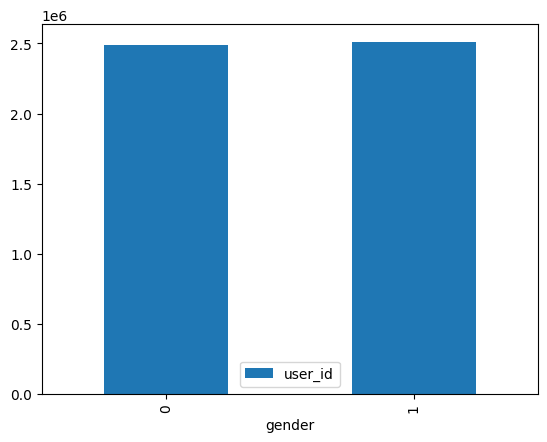

In [60]:
users.groupby('gender').agg({ 'user_id' : len }).plot.bar()

In [61]:
users.reset_index()

,index,user_id,gender,age
0,0,2,1,61
1,1,3,1,55
2,2,6,0,46
3,3,14,0,66
4,4,17,0,53
...,...,...,...,...
4999995,4999995,17588859,1,64
4999996,4999996,17588860,0,69
4999997,4999997,17588861,1,51
4999998,4999998,17588864,0,30


In [62]:
req1 = pd.read_parquet('mnt/requests/part_0.parquet')
req1

,timestamp,geo_id,referer,user_id,user_agent
0,1712169477,1224,https://www.domain_1118/path_107938,1628092,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
1,1711945301,2540,https://domain_3207/path_175610,1013613,Mozilla/5.0 (Linux; Android 8.1.0; Redmi 5 Plu...
2,1712154596,4402,https://domain_2194/path_172150,8274161,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,1711941903,3833,https://domain_2042/path_144480,17082498,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,1712088484,3866,https://domain_3191/path_9105,12787875,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
...,...,...,...,...,...
10000449,1712161101,702,https://domain_662/path_131980,2062442,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...
10000450,1711940706,3515,https://domain_1784/path_45033,2375719,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...
10000451,1712107755,3173,https://domain_1654/path_48166,11781572,Mozilla/5.0 (Linux; arm_64; Android 13; SM-A14...
10000452,1712107427,3833,https://domain_1654/path_10504,15183751,Mozilla/5.0 (Linux; arm_64; Android 12; SM-M21...


In [68]:
req_cuted = req1.head(1000000)
req_cuted

req_cuted = req_cuted.merge(users, left_on='user_id', right_on='user_id')
# req_cuted.isna().sum()

In [69]:
req_cuted = req_cuted[req_cuted['referer'] != '']

In [70]:
req_cuted

,timestamp,geo_id,referer,user_id,user_agent,gender,age
0,1711945301,2540,https://domain_3207/path_175610,1013613,Mozilla/5.0 (Linux; Android 8.1.0; Redmi 5 Plu...,1,75
1,1711941903,3833,https://domain_2042/path_144480,17082498,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0,72
2,1712088484,3866,https://domain_3191/path_9105,12787875,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1,73
3,1711918808,1840,https://domain_551/path_175610,8871292,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,0,18
4,1711922368,1840,https://domain_551/path_175610,8871292,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,0,18
...,...,...,...,...,...,...,...
449405,1712139759,3833,https://domain_2662/path_195691,5864301,Mozilla/5.0 (Linux; arm_64; Android 11; SM-A50...,0,59
449406,1712045154,836,https://domain_2042/path_179513,141203,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4 like M...,1,50
449407,1712142760,3173,https://domain_3008/path_10610,12466515,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,0,41
449409,1712171200,3868,https://domain_1654/path_37732,812042,Mozilla/5.0 (Linux; arm_64; Android 10; MI 8) ...,0,59


In [71]:
    def f(string):
        pos =  string.find('domain')
        string2 = string[pos: pos + 12]
        pos2 =  string2.find('/')
        return string2[0: pos2]

    req_cuted['domain'] = req_cuted['referer'].apply(f)
    req_cuted['domain']


0         domain_3207
1         domain_2042
2         domain_3191
3          domain_551
4          domain_551
             ...     
449405    domain_2662
449406    domain_2042
449407    domain_3008
449409    domain_1654
449412    domain_2042
Name: domain, Length: 431338, dtype: object

75 935


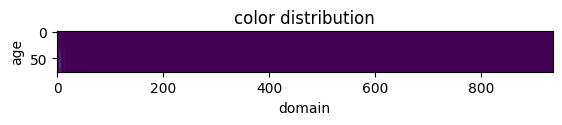

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def show_distribution(df, column_x, column_y):
    df2 = df.copy()
    df2 = df2.groupby([column_x])[column_y].value_counts()
    age_max = 0
    domains = {}
    domain_counter = 0
    for (age_, domain_name), value in df2.items():
        if age_ > age_max:
            age_max = age_
        if domain_name not in domains:
            domains[domain_name] = domain_counter
            domain_counter += 1
    print(age_max, domain_counter)
    data = np.zeros((age_max + 1, domain_counter))
    for (age_, domain_name), value in df2.items():
        data[age_][domains[domain_name]] = value
    fig, ax = plt.subplots()
    im = ax.imshow(data)
    plt.title( "color distribution" )
    plt.xlabel(column_y)
    plt.ylabel(column_x)
    # Adding a color bar to the plot
    # Displaying the plot
    plt.show()
show_distribution(req_cuted, 'age', 'domain')

In [48]:
def age_count(df, age_):
    df2 = df.copy()
    df2 = df2[df2['age'] == age_]
    df2 = df2.groupby(['age'])['domain'].value_counts()
    print(df2)
for i in range(80):
    # age_count(req_cuted, i)

IndentationError: expected an indented block (1694733052.py, line 7)

In [46]:
import pandas as pd
import numpy as np

DataFat = pd.read_csv('data/full_data_cleaned.csv')
DataFat

,Unnamed: 0,user_id,browser,os,device,mobile,region_id,country_id,hour,MSK+,...,group,gender_y,age_14_18,age_19_25,age_26_30,age_31_40,age_41_55,age_55+,event_time,domain
0,0,3,Chrome Mobile,Android,K,True,73,40,15,2,...,age_41_55,0.745030,0.021173,0.047992,0.042184,0.196197,0.335737,0.356718,"tensor([0, 0])","tensor([47, 55])"
1,1,25,Chrome Mobile WebView,Android,Other,True,152,18,14,4,...,age_55+,0.243259,0.002040,0.004651,0.003468,0.050871,0.313303,0.625668,"tensor([0, 0])","tensor([15, 15])"
2,2,31,Yandex Browser,Windows,Other,False,184,40,11,2,...,age_41_55,0.556745,0.006560,0.025874,0.024128,0.181040,0.421230,0.341168,"tensor([0, 0])","tensor([4, 4])"
3,3,43,Chrome Mobile,Android,K,True,78,40,12,4,...,age_55+,0.523895,0.014683,0.018973,0.011838,0.088596,0.267435,0.598475,"tensor([0, 0])","tensor([3, 3])"
4,4,46,Chrome Mobile,Android,K,True,189,40,7,2,...,age_55+,0.419545,0.015432,0.030092,0.019569,0.144487,0.365011,0.425409,"tensor([0, 0])","tensor([185, 4])"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995482,995482,17588850,Chrome Mobile,Android,K,True,184,40,1,2,...,age_31_40,0.883307,0.047583,0.139914,0.108174,0.309601,0.257548,0.137181,"tensor([0, 0])","tensor([181, 55])"
995483,995483,17588852,Chrome,Android,Other,True,184,40,9,2,...,age_41_55,0.523895,0.014683,0.018973,0.011838,0.088596,0.267435,0.598475,tensor([0]),tensor([3])
995484,995484,17588853,Chrome,Windows,Other,False,110,40,8,2,...,age_41_55,0.321041,0.016692,0.027010,0.025891,0.215945,0.372589,0.341873,"tensor([0, 0, 0, 0])","tensor([26, 26, 26, 5])"
995485,995485,17588860,Chrome,Windows,Other,False,184,40,1,2,...,age_55+,0.585415,0.013573,0.027390,0.020273,0.147212,0.356536,0.435016,"tensor([0, 0, 0, 0, 0])","tensor([2, 2, 2, 6, 5])"


In [47]:
DataFat = DataFat.drop(columns=["Unnamed: 0"])

In [48]:
DataFat = DataFat.replace('NaN', 0)

In [49]:
DataFat.columns

Index(['user_id', 'browser', 'os', 'device', 'mobile', 'region_id',
       'country_id', 'hour', 'MSK+', 'gender_x', 'age', 'group', 'gender_y',
       'age_14_18', 'age_19_25', 'age_26_30', 'age_31_40', 'age_41_55',
       'age_55+', 'event_time', 'domain'],
      dtype='object')

In [50]:

for label_ in DataFat.columns:
    print(label_ + 's', len(np.unique(DataFat[label_]))) 

user_ids 995487
browsers 11
oss 11
devices 10
mobiles 2
region_ids 269
country_ids 148
hours 24
MSK+s 13
gender_xs 2
ages 62
groups 6
gender_ys 62149
age_14_18s 60178
age_19_25s 60208
age_26_30s 60136
age_31_40s 60677
age_41_55s 61835
age_55+s 61682
event_times 28
domains 83205


In [51]:
DataFat = DataFat.drop(columns=["group", "region_id", 'region_id', 'MSK+'])

In [ ]:
!pip install catboost
!pip install plotly
!pip install scipy
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install pyarrow
!pip install matplotlib
!pip install tqdm
!pip install pandas
!pip install xgboost
!pip install cloudpickle
!pip install fsspec
!pip uninstall protobuf
!pip install protobuf==3.20.0
!pip install scikit-learn
!pip install click
!pip install cloudpickle
!pip install fsspec
!pip install optuna

In [52]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import xgboost as xgb
import lightgbm

import catboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import optuna
from optuna.samplers import TPESampler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

def tensor_to_array(string):
    string = string[8:-2]
    array_ = string.split(',')
    return np.array(array_, dtype=int).mean()

class Model_Predictor():
    model = None
    logreg = LogisticRegression()
    predict_labels = ['gender_x', 'age']
    categories_labels = None
    def __init__(self, model_, metric_, categories_labels_, value_labels_, tensor_labels_, logreg_ = LogisticRegression()) -> None:
        self.model = model_
        self.metric = metric_
        self.categories_labels = categories_labels_
        self.tensor_labels = tensor_labels_
        self.logregs = None
        self.value_labels = value_labels_
        self.normalizers = None
        self.min_y_val = None
    def convert_X(self, X = None):
        X_new = pd.get_dummies(X, columns = self.categories_labels)
        return X_new
        
    def fit(self, X, y):
        X = X.copy()
        X = self.convert_X(X)
        self.normalizers = [0]*len(self.value_labels)
        for i, label_ in enumerate(self.value_labels):
            self.normalizers[i] = (X[label_].mean(), X[label_].std())
            mean_, std_ = self.normalizers[i]
            X[label_] = (X[label_] - mean_)/std_

        self.tensor_normalizers = [0]*len(self.tensor_labels)
        for i, label_ in enumerate(self.tensor_labels):
            X[label_] = X[label_].apply(tensor_to_array)
            self.tensor_normalizers[i] = (X[label_].mean(), X[label_].std())
            mean_, std_ = self.tensor_normalizers[i]
            X[label_] = (X[label_] - mean_)/std_
        self.min_y_val = np.min(y)
        self.model.fit(X, y - np.min(y))
        self.colums = X.columns
        return self
    def predict(self, X, y):
        X = X.copy()
        X = self.convert_X(X)
        for i, label_ in enumerate(self.value_labels):
            mean_, std_ = self.normalizers[i]
            X[label_] = (X[label_] - mean_)/std_
            
        for i, label_ in enumerate(self.tensor_labels):
            X[label_] = X[label_].apply(tensor_to_array)
            self.tensor_normalizers[i] = (X[label_].mean(), X[label_].std())
            mean_, std_ = self.tensor_normalizers[i]
            X[label_] = (X[label_] - mean_)/std_
        return self.metric(self.model.predict(X) + self.min_y_val, y)

In [54]:
from sklearn.metrics import accuracy_score
# numerical_labels = ['domain','big_adults', 'children', 'elderly', 'middle_adults', 'small_adults', 'young']
# categorical_labels = ['browser', 'os', 'mobile', 'hour', 'MSK+', 'group'] 
categorical_labels = ['browser', 'os', 'device', 'mobile',
    'hour']

numerical_labels = ['gender_y', 'age_14_18', 'age_19_25', 'age_26_30', 'age_31_40',
             'age_41_55', 'age_55+']
tensor_labels = ['event_time', 'domain']


In [55]:
from sklearn.metrics import mean_absolute_error

xgb_params = {'n_estimators': 50,
         'max_depth': 9,
         'learning_rate': 0.0268,
         'min_child_weight': 10,
         'gamma': 0.22,
         'subsample': 0.62,
         'colsample_bytree': 0.33,
         'reg_alpha': 1.5211300201400934e-05,
         'reg_lambda': 0.0005497911242012908}
xgb_model = xgb.XGBClassifier(**xgb_params)

model = Model_Predictor(xgb_model, mean_absolute_error, categorical_labels, numerical_labels, tensor_labels)
DataFat = DataFat[categorical_labels+tensor_labels+numerical_labels+['age']]
sep = int(DataFat.shape[0]*0.67)
X_train = DataFat.iloc[1:sep, :]
X_train = X_train[categorical_labels+tensor_labels+numerical_labels]
y_train = DataFat.iloc[1:sep, :]
y_train = y_train[['age']]

X_test = DataFat.iloc[sep:, :]
X_test = X_test[categorical_labels+tensor_labels+numerical_labels]
y_test = DataFat.iloc[sep:]
y_test = y_test[['age']]
model.fit(X_train, y_train)
# model.predict(X_test, y_test)

In [56]:
import time
start = time.time()
# print(model.predict(X_train, y_train))

print(model.predict(X_test, y_test))
end = time.time()
# print(end - start)


17.418518710180177


In [60]:
X_train.isna().sum()

browser         0
os              0
device          0
mobile          0
hour            0
event_time      0
domain          0
gender_y        0
age_14_18      64
age_19_25      46
age_26_30     146
age_31_40       0
age_41_55       0
age_55+         0
dtype: int64

In [57]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor


def train_model(user_model):
    global DataFat
    model = Model_Predictor(user_model, mean_absolute_error, categorical_labels, numerical_labels, tensor_labels)
    DataFat = DataFat[categorical_labels+tensor_labels+numerical_labels+['age']]
    sep = int(DataFat.shape[0]*0.67)
    X_train = DataFat.iloc[1:sep, :]
    X_train = X_train[categorical_labels+tensor_labels+numerical_labels]
    y_train = DataFat.iloc[1:sep, :]
    y_train = y_train[['age']]

    X_test = DataFat.iloc[sep:, :]
    X_test = X_test[categorical_labels+tensor_labels+numerical_labels]
    y_test = DataFat.iloc[sep:]
    y_test = y_test[['age']]
    model.fit(X_train, y_train)
    print(model.predict(X_test, y_test))

catboost_params = {'loss_function': 'MAE',
                   'learning_rate': 0.065,
                     'l2_leaf_reg': 0.43,
                     'colsample_bylevel': 0.083,
                     'depth': 10,
                     'min_data_in_leaf': 15,
                     'subsample': 0.73}
catboost_model = catboost.CatBoostRegressor(**catboost_params)
logreg = LogisticRegression()
# train_model(catboost_model)
train_model(logreg)

# train_model(catboost_model)
# model.predict(X_test, y_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values